#  Predicting percentage of student based on No. of hours of study


In [1]:
# Import all the necessary libraries

import pandas as pd
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Loading the data and sorting it by Hours column
url="http://bit.ly/w-data"
df=pd.read_csv(url)
df.info()
df.sort_values(by="Hours",inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [3]:
## Viewing the data
df.head()

,Hours,Scores
14,1.1,17
5,1.5,20
17,1.9,24
0,2.5,21
16,2.5,30


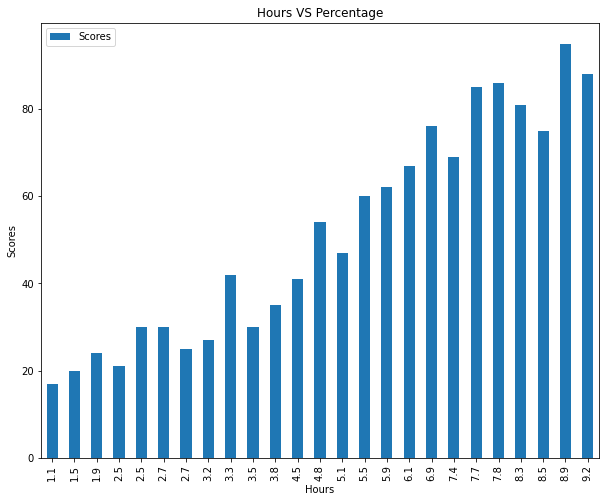

In [4]:
## Plotting the Graph for above data
df.plot(x="Hours",y="Scores",kind="bar",figsize=(10,8))
plt.title("Hours VS Percentage")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show();


## Preparing data for training and test set

In [5]:
x = df.drop("Scores",axis=1) 
y = df["Scores"]

In [6]:
# Splitting data for training and test set
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

In [7]:
# Training our model
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train);

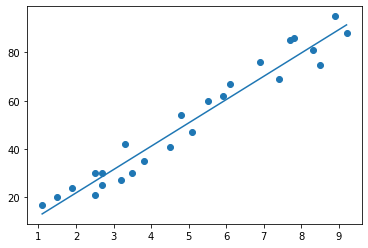

In [8]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

## Making prediction

In [9]:
y_preds=regressor.predict(x_test)
y_preds

array([28.6177145 , 20.88803334, 76.92822173, 61.46885942, 46.0094971 ])

In [10]:
data=pd.DataFrame({"Actual":y_test,"Predicted":y_preds})
data

,Actual,Predicted
20,30,28.617714
17,24,20.888033
10,85,76.928222
18,67,61.468859
12,41,46.009497


##  Graph of True Label VS Predicted Label


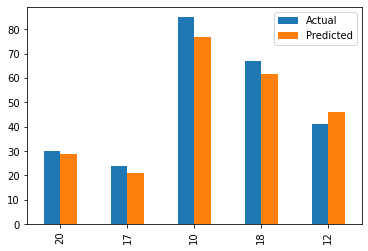

In [11]:
data.plot(kind='bar');

### Testing Score for 9.25 Hours

In [12]:
hour=[[9.25]]
Predicting_score=regressor.predict(hour)
print(f"Number of hours to study: {9.25}")
print(f"Predicting score for {9.25} hours study: {Predicting_score[0]}")

Number of hours to study: 9.25
Predicting score for 9.25 hours study: 91.904478976234


### Evaluating the model

In [15]:
# Create evaluation functions
from sklearn.metrics import mean_absolute_error,r2_score


# Create function to evaluate model on few different levels
def show_scores(model):
    test_preds=model.predict(x_test)
    scores={"Mean Absolute Error ":mean_absolute_error(y_test,test_preds),
            "R^2 score" :r2_score(y_test,test_preds)}
    
    return scores

In [16]:
show_scores(regressor)

{'Mean Absolute Error ': 4.621333622532769, 'R^2 score': 0.9503831741928792}